<a href="https://colab.research.google.com/github/jiayuankeliang/309CourseWork2/blob/main/309CourseWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, you must ensure your location is in the same level as 'data' floder

In [11]:
%cd /content/drive/MyDrive
%ls

/content/drive/MyDrive
 309CourseWork2/  'Colab Notebooks'/   data/


import moudle

In [12]:
import os
import numpy as np
from PIL import Image 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from concurrent.futures import ThreadPoolExecutor,as_completed
import pandas as pd

load  label and show

In [13]:
label_path = '/content/drive/MyDrive/data/Meta'
labels = {}
for file_name in os.listdir(label_path):
  key = file_name.replace('.png', '')
  labels[int(key)] = Image.open(os.path.join(label_path, file_name))

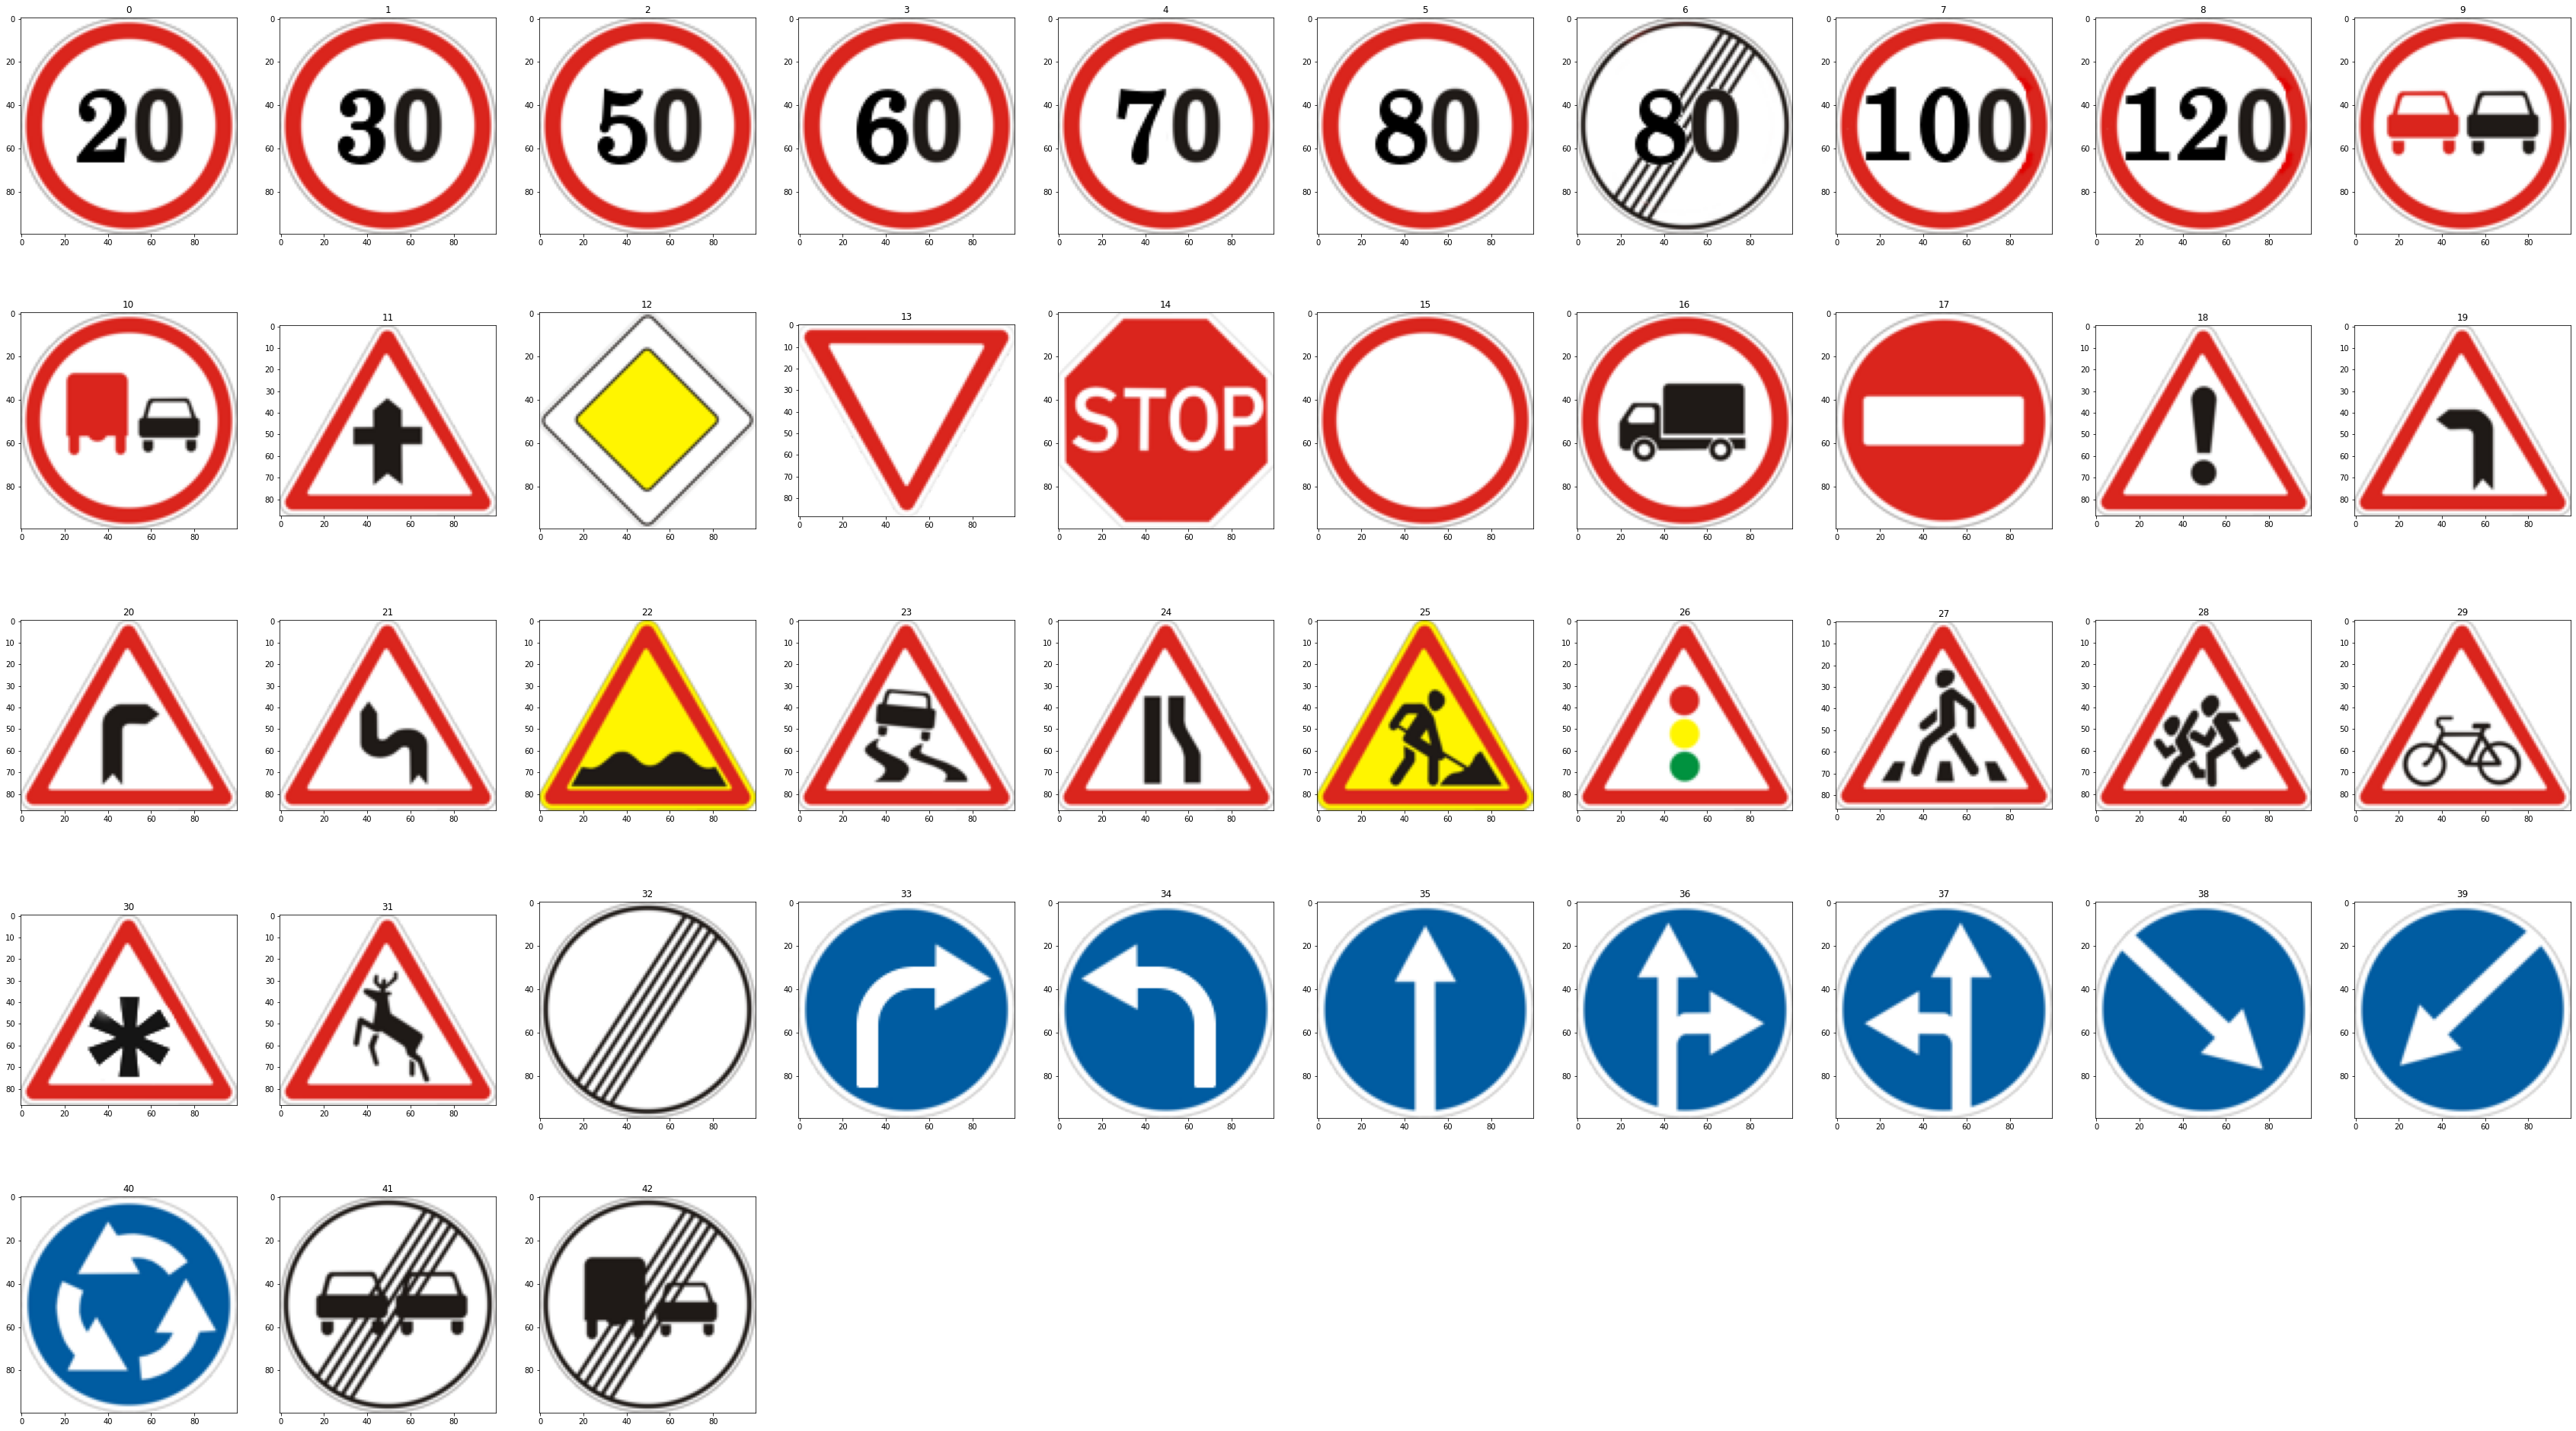

In [14]:
plt.figure(figsize=(60, 70))
for label, image in labels.items():
    ax = plt.subplot(10, 10, label + 1)
    plt.imshow(image)
    plt.title(int(label))

load train data

In [15]:
X_train_path = '/content/drive/MyDrive/data/X_train.npz'
Y_train_path = '/content/drive/MyDrive/data/Y_train.npz'

X_train_file = np.load(X_train_path)
Y_train_file = np.load(Y_train_path)

X_train = X_train_file['arr_0']
Y_train = Y_train_file['arr_0']

X_train.shape, Y_train.shape

((39209, 30, 30, 3), (39209,))

show train image

label and sample


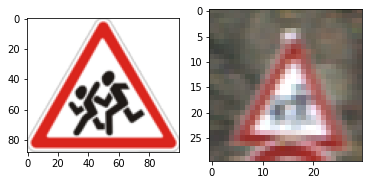

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
index = 39208
print('label and sample')
ax1.imshow(labels[Y_train[index]])
ax2.imshow(X_train[index])

In [30]:
X_train.shape

(39209, 30, 30, 3)

load test data

In [21]:
X_test_path = '/content/drive/MyDrive/data/X_test.npz'
Y_test_path = '/content/drive/MyDrive/data/Y_test.npz'

X_test_file = np.load(X_test_path)
Y_test_file = np.load(Y_test_path)

X_test = X_test_file['arr_0']
Y_test = Y_test_file['arr_0']

X_test.shape, Y_test.shape

((12630, 30, 30, 3), (12630,))

show test image

label and sample


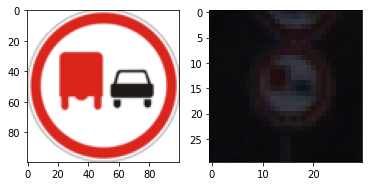

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
index = 12629
print('label and sample')
ax1.imshow(labels[Y_test[index]])
ax2.imshow(X_test[index])

check GPU available

In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


start with a simple model

In [31]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 5, activation="relu", padding="same",
                        input_shape=[30, 30, 3]),
    keras.layers.Conv2D(32, 3, activation="relu", padding="same", input_shape=[30, 30, 3]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(rate=0.25),    
    keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(43, activation="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy", optimizer="Adam", metrics = ["accuracy"])

with tf.device('/GPU:0'):
    epochs = 25
    history1 = model.fit(X_train, Y_train, batch_size=32, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/25
1226/1226 [==============================] - 11s 7ms/step - loss: 1.5305 - accuracy: 0.5835 - val_loss: 0.3577 - val_accuracy: 0.8995
Epoch 2/25
1226/1226 [==============================] - 8s 7ms/step - loss: 0.2861 - accuracy: 0.9232 - val_loss: 0.2737 - val_accuracy: 0.9301
Epoch 3/25
1226/1226 [==============================] - 8s 7ms/step - loss: 0.1970 - accuracy: 0.9473 - val_loss: 0.2438 - val_accuracy: 0.9422
Epoch 4/25
1226/1226 [==============================] - 8s 7ms/step - loss: 0.1802 - accuracy: 0.9553 - val_loss: 0.2689 - val_accuracy: 0.9367
Epoch 5/25
1226/1226 [==============================] - 8s 7ms/step - loss: 0.1716 - accuracy: 0.9595 - val_loss: 0.1718 - val_accuracy: 0.9552
Epoch 6/25
1226/1226 [==============================] - 8s 7ms/step - loss: 0.1756 - accuracy: 0.9580 - val_loss: 0.3612 - val_accuracy: 0.9443
Epoch 7/25
1226/1226 [==============================] - 8s 7ms/step - loss: 0.1556 - accuracy: 0.9642 - val_loss: 0.2497 - val_accuracy

train acc/loss and val acc/loss

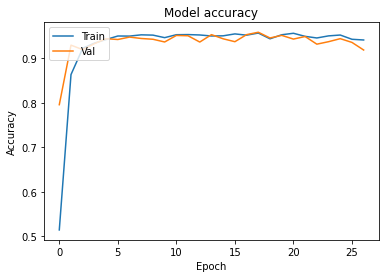

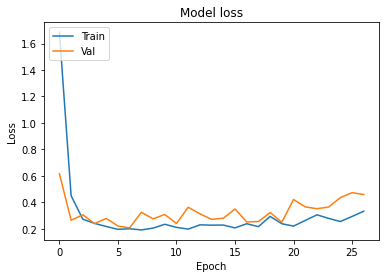

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

overfitting